In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

# Load the dataset from a local CSV file
titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")

# Preview the first few rows
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
#printing missing values

print("\nMissing values in each column:\n", titanic_data.isnull().sum())

print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing values in each column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


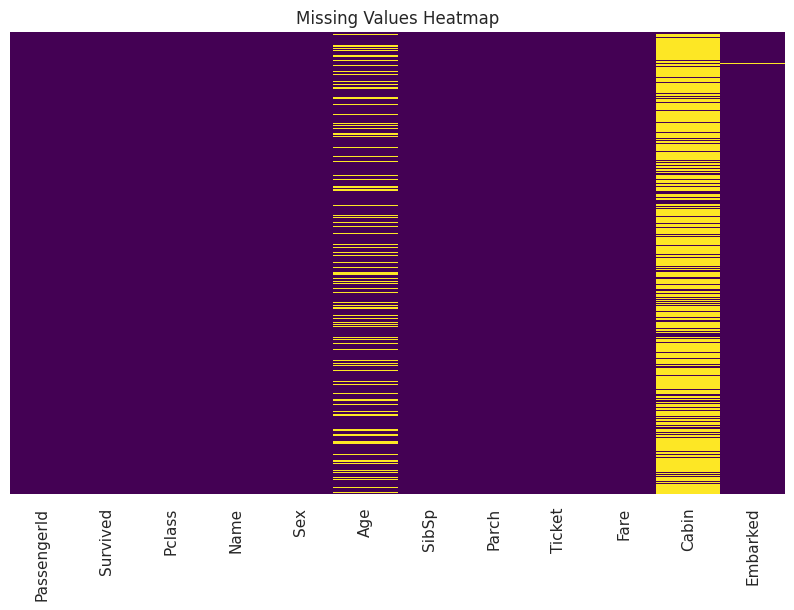

In [11]:
#create missing value's heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()

In [9]:
#check for missing values

print("Shape of the dataset:", titanic_data.shape)

print("\nColumns in the dataset:\n", titanic_data.columns)


print("\nMissing values in each column:\n", titanic_data.isnull().sum())

print("\nData types:\n", titanic_data.dtypes)

print("\nSummary Statistics:\n", titanic_data.describe(include='all'))

Shape of the dataset: (891, 12)

Columns in the dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [12]:
#Imputing missing values

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor



# Create a copy to avoid modifying the original DataFrame

titanic_data_filled = titanic_data.copy()

# Separate numerical and categorical columns

numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns

categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns



# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])



# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:

    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
#Now check for missing values

print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


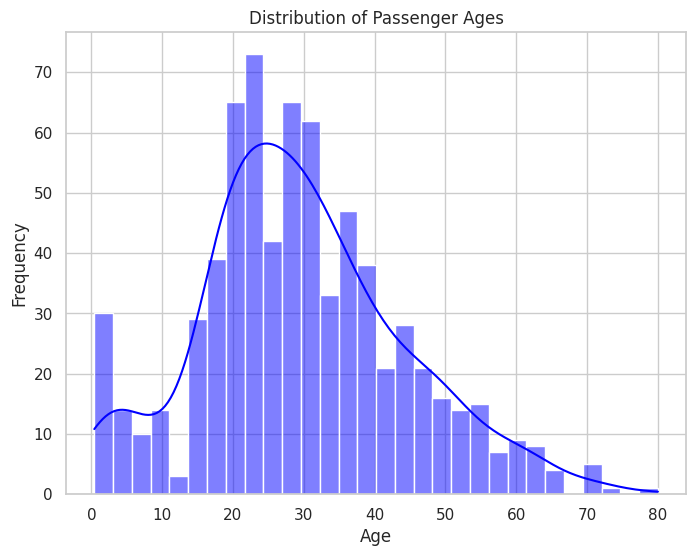

In [3]:
#Checking distribution of ages

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_77/487240179.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data, ci=None)


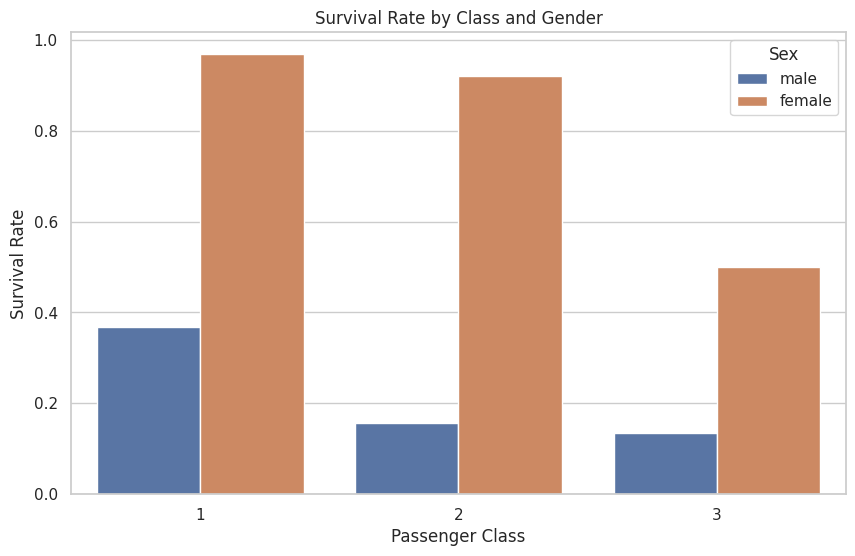

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data, ci=None)
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [6]:
#one hot encoding of data for string to float conversation

# Perform one-hot encoding on the categorical columns
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the encoded dataset
print(titanic_data_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN      True       False        True  
1          PC 17599  71.2833   C85     False       False       False  
2  STON/O2. 3101282   7.9250   NaN     False       False        True  
3            113803  53.1000  C123     Fal

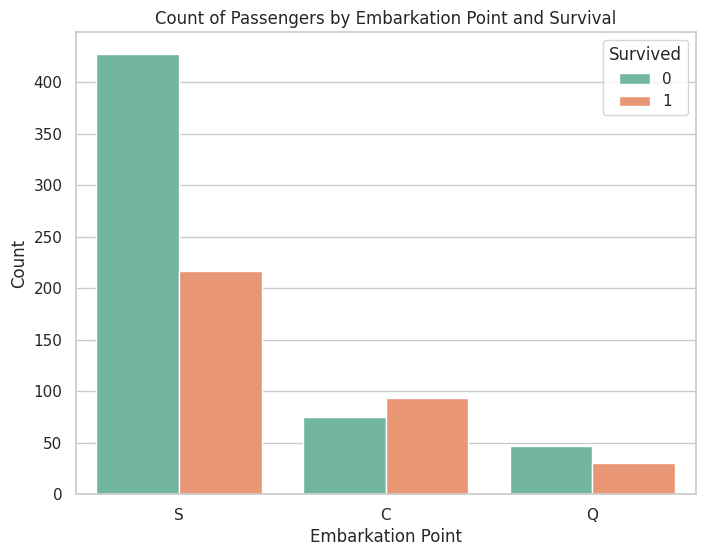

In [8]:
#Pessenger count by surviaval

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='Set2')
plt.title('Count of Passengers by Embarkation Point and Survival')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()


Survival by Passenger Class:
 Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


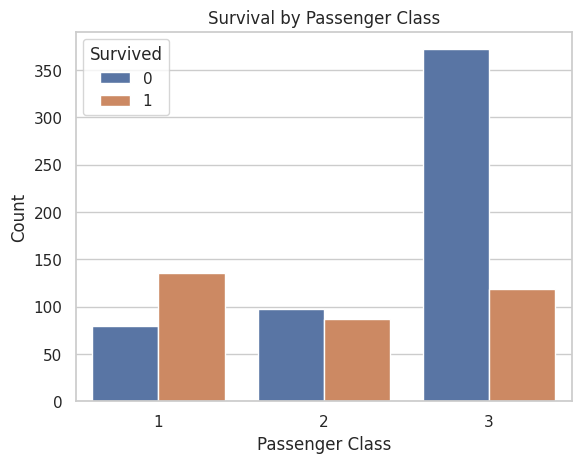

In [17]:
#Bivariate Analysis

print("\nSurvival by Passenger Class:\n", titanic_data.groupby('Pclass')['Survived'].value_counts())

# Plot survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()






Survival by Gender:
 Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


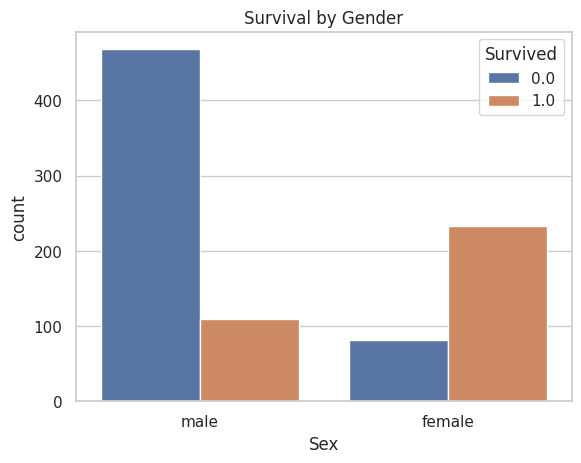

In [19]:
# Analyze survival based on gender

print("\nSurvival by Gender:\n", titanic_data_filled.groupby('Sex')['Survived'].value_counts())

sns.countplot(x='Sex', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Gender')

plt.show()


Survival by Age Group:
 age_group  Survived
Child      0.0          80
           1.0          74
Adult      0.0         462
           1.0         267
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


/tmp/ipykernel_77/1460814204.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['Survived'].value_counts())
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

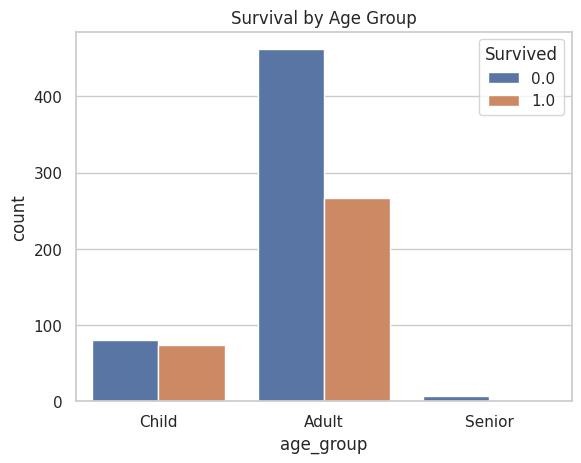

In [22]:
# Analyze survival based on age groups (create age bins)

titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['Survived'].value_counts())

sns.countplot(x='age_group', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Age Group')

plt.show()

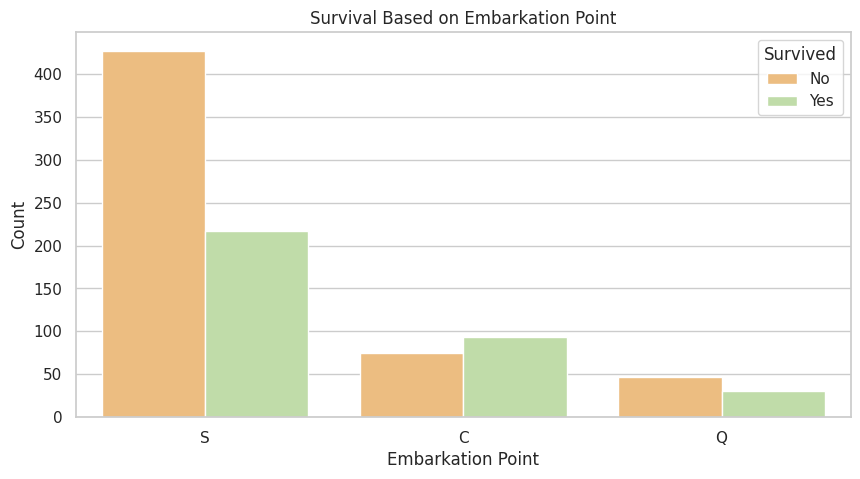

In [23]:
# Survival Based on Embarkation Point

plt.figure(figsize=(10, 5))

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='Spectral')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

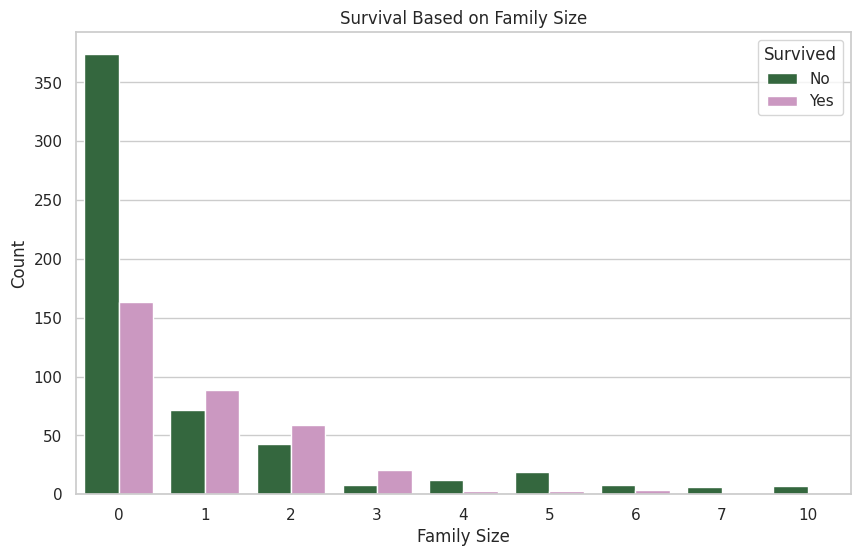

In [26]:
# Family Size Analysis

titanic_data['family_size'] = titanic_data['SibSp'] + titanic_data['Parch']



plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='Survived', data=titanic_data, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

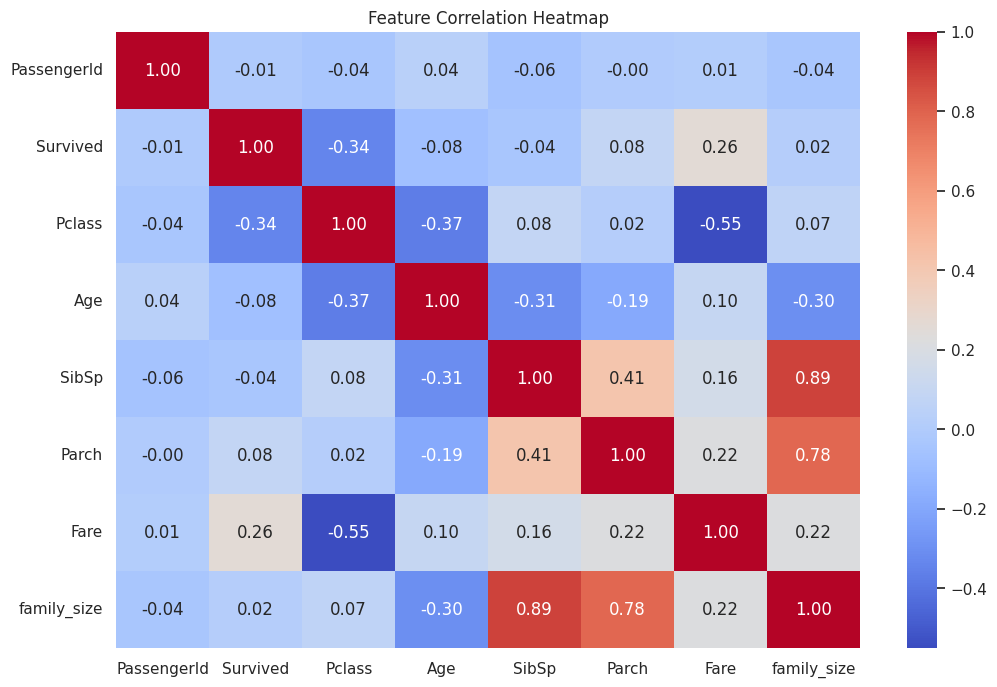

In [27]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = titanic_data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


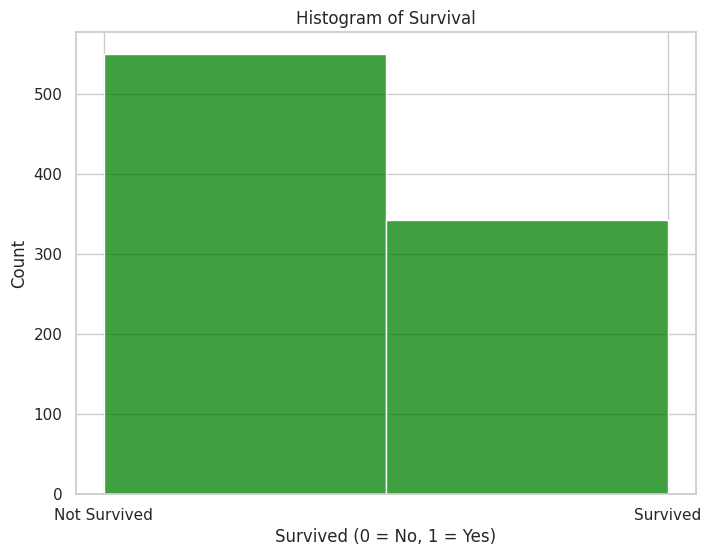

In [28]:
# Histogram for survied and not survieved

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of survivals
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Survived'], bins=2, kde=False, color='green')
plt.title('Histogram of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

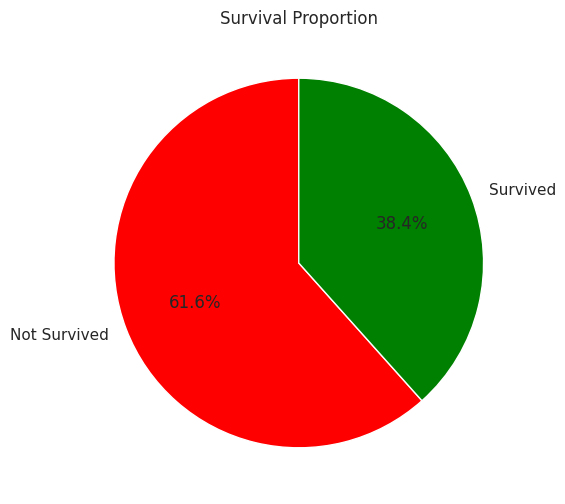

In [29]:
# Pie chart for survied and not survieved 

import matplotlib.pyplot as plt

# Pie chart of survival
survival_counts = titanic_data['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
colors = ['red', 'green']

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Survival Proportion')
plt.show()